In [261]:
import sympy as sp
from sympy import Eq, solve, sqrt, pi, symbols

In [262]:
sp.init_printing()

In [263]:
# Symbole
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
psi = sp.Function('psi')


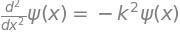

In [264]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [265]:
# Rozwiązanie równania Schrödingera
sol = sp.dsolve(eq, psi(x))
sol

In [266]:
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol

In [267]:
sol = sol.subs(k, n * sp.pi / a)
sol

In [268]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

In [269]:
sol.rhs * x * sol.rhs

In [270]:
# Wartości oczekiwane
x_expectation = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
x_expectation

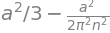

In [271]:
x_squared_expectation = sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
x_squared_expectation

In [272]:
p_expectation = sp.integrate(sol.rhs * sp.I * h * sol.rhs.diff(x), (x, 0, a)).simplify()
p_expectation

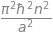

In [273]:
p_squared_expectation = sp.integrate(sol.rhs * (-h**2 * sol.rhs.diff(x, x)), (x, 0, a)).simplify()
p_squared_expectation

In [274]:
x = sp.sqrt(p_squared_expectation)
x

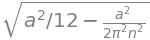

In [275]:
# Odchylenia standardowe
sigma_X = sp.sqrt(x_squared_expectation - x_expectation**2)
sigma_X

In [276]:
sigma_P = sp.sqrt(p_squared_expectation - p_expectation**2)
sigma_P

In [277]:
heisenberg_inequality = (sigma_X * sigma_P >= h / 2).simplify()
heisenberg_inequality

In [278]:
n = symbols('n')
inequality = Eq(h * 1/2, h * sqrt(3 * (pi**2) * (n**2) - 18) / 6)
solution = solve(inequality, n)


print(f"n >=  {solution}")


n >=  [-3/pi, 3/pi]


In [279]:
solution